C:\Users\ialak\AppData\Local\Temp\ipykernel_2776\2994507755.py:14: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_WPS:


Using device cpu


100%|██████████| 50/50 [22:06<00:00, 26.54s/it]


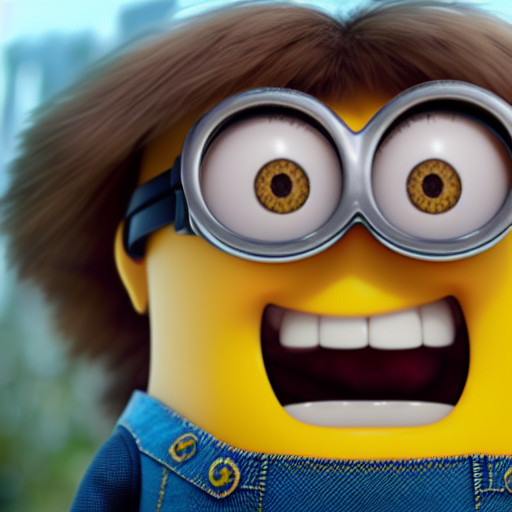

In [2]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_WPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_WPS:
    DEVICE = "mps"
print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json", merges_file="../data/tokenizer_merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


## TEXT TO IMAGE
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
uncond_prompt = "" # We can also use a negative prompt
do_cfg = True
cfg_scale = 7


# IMAGE TO IMAGE
input_image = None
image_path = "../images/dog.jpg"
# input_image = Image.oprn(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)